# matplotlib Plotting Cookbook

Источники: 
1. Matplotlib Plotting Cookbook
2. Numerical Python. Robert Johanson. 2019. 2nd ed.
3. [Документация matplotlib](https://matplotlib.org/)

Графические библиотеки Python:
* [matplotlib](https://matplotlib.org/) - фокусируется на генерации статичный пригодных для публикации 2D и 3D графиуов
* [Bokeh](http://bokeh.pydata.org/) и [Plotly](http://plot.ly/) - библиотеки, фокус которых на web-интерактивности и подключаемости
* [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) - графическая библиотека высокого уровня, которая нациелена на анализ данных 
* [Mayavi](http://docs.enthought.com/mayavi/mayavi) - для высококачесвтенной 3D-визуализации
* [VisPy](http://vispy.org/) - основанная на OpenGL 2D и 3D визуализация с огромной интерактивность и подключаемостью в браузерные средны, вроде JN

Существует 2 подхода к научной визуализации: 
1. Использование графического интерфейса для ручного построения графики
2. Программистский подход - графики создаются кодом. 

matplotlib предоставляет множество точек входа в библиотеку, с различными Application Programming Interface (API).  
``import matplotlib.pyplot as plt``
1. Статичный API
2. ООП API

Несмотря на то, что для коротких примеров статичный API может быть довольно удобным, читабельность и maintainability кода, написанного в статичном API плохо масштабируется. Также зависимая от состояния природа такого кода делает сложным перестановку или повторное использование. 

Для использования ООП-API matplotlib необходимы следующие импорты:

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
import numpy as np
import sympy

## Введение

**Магические команды Jupyter Notebook**

In [1]:
# Магические команды
%matplotlib notebook #Интерактивный режим
%matplotlib qt
%matplotlib inline #Вывод в Jupyter'е

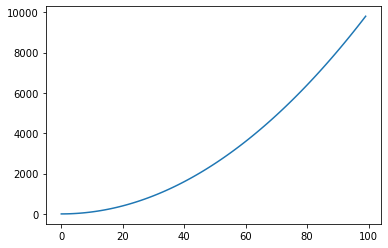

In [2]:
import matplotlib.pyplot as plt
X = range(100)
Y = [value**2 for value in X]
plt.plot(X, Y) #Строит кривую
plt.show()

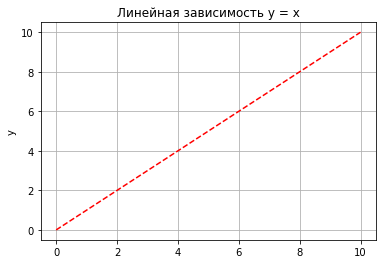

In [23]:
x = np.linspace(0, 10, 50) 
y = x

plt.title('Линейная зависимость y = x') # заголовок plt.xlabel('x')     
plt.ylabel('y')    # ось абсцисс  
plt.grid()          # ось ординат # включение отображение сетки 
plt.plot(x, y, 'r--') # построение графика

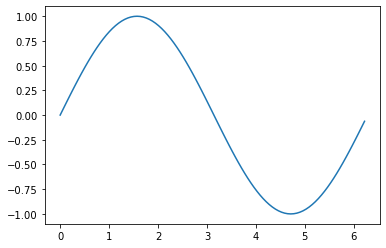

In [2]:
import math
import matplotlib.pyplot as plt
T = range(100)
X = [(2 * math.pi * t) / len(T) for t in T]
Y = [math.sin(value) for value in X]
plt.plot(X, Y)
plt.show()

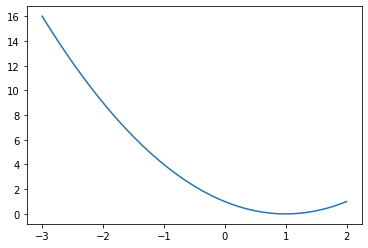

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-3, 2, 200)
Y = X ** 2 - 2 * X + 1.
plt.plot(X, Y)
plt.show()

Первая строка говорит Python, что мы используем модуль matplotlib.pyplot.

## Основые элементы графика

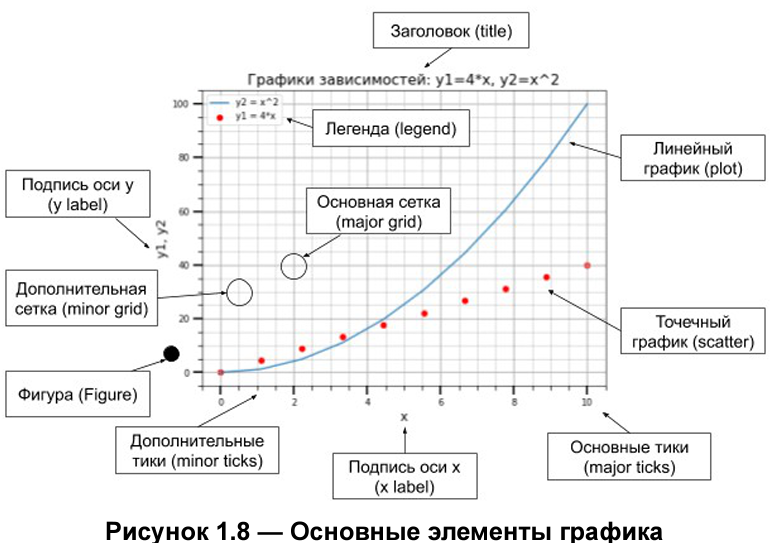

Корневым элементом при построении графиков в системе Matplotlib является **фигура** (``Figure``). Все, что нарисовано на рисунке выше является элементами фигуры. 

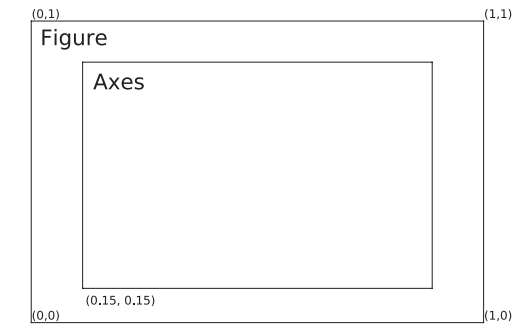

Фигура может содержать несколько ``Axes``. Axes могут быть вручную расположены на фигуре, а также автоматически расположены на ней. 

``Axes`` предоставляет систему координат для изображения графиков. ``Axes`` определяет как система координат изображается, анпример, названия осей, деления и их имена и т.д. 

При работе с ООП-API matplotlib большинство функций необходимых нам - это методы класса ``Axes``

Рассмотрим ее составляющие более подробно. График На рисунке представлены два графика - линейный и точечный. Matplotlib предоставляет огромное количество различных настроек, которые можно использовать для того, чтобы придать графику требуемый вид: задать цвет, толщину, тип, стиль линии и многое другое, все это мы рассмотрим в ближайших уроках. 

Вторым, после непосредственно самого графика, по важности элементом фигуры являются оси. Для каждой оси можно задать метку (подпись), основные (major) и дополнительные (minor) элементы шкалы, их подписи, размер, толщину и диапазоны. Сетка и легенда Сетка и легенда являются элементами фигуры, которые значительно повышают информативность графика. Сетка может быть основной (major) и дополнительной (minor). Каждому типу сетки можно задавать цвет, толщину линии и тип. Для отображения сетки и легенды используются соответствующие команды. 

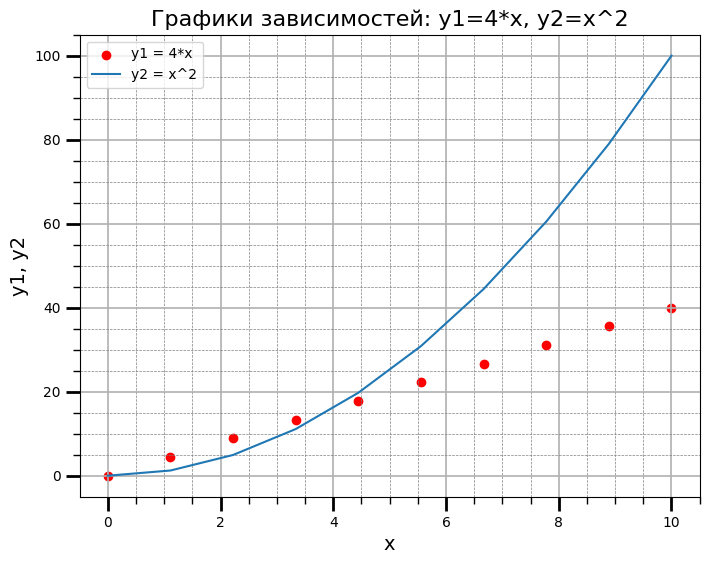

In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
import numpy as np 
x = np.linspace(0, 10, 10) 
y1 = 4*x 
y2 = [i**2 for i in x] 
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.set_title('Графики зависимостей: y1=4*x, y2=x^2', fontsize=16) 
ax.set_xlabel('x', fontsize=14) 
ax.set_ylabel('y1, y2', fontsize=14) 
ax.grid(which='major', linewidth=1.2) 
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)

ax.scatter(x, y1, c='red', label='y1 = 4*x')
ax.plot(x, y2, label='y2 = x^2')
ax.legend()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)
plt.show()

* ``fig, ax = plt.subplots()`` - функция, которая генерирует ``Figure`` и ``Axes``. Она может быть использована для генерации сеток для ``Axes`` на фигуре. Но в следующем примере она преимущественно используется для генерации фигуры и оси. 
* ``ax.plot`` - используется для создания графика
* ``ax.set_xlabel``, ``ax.set_ylabel`` - названия осей абсцисс и ординат
* ``ax.legend`` - генерирует легенду оси

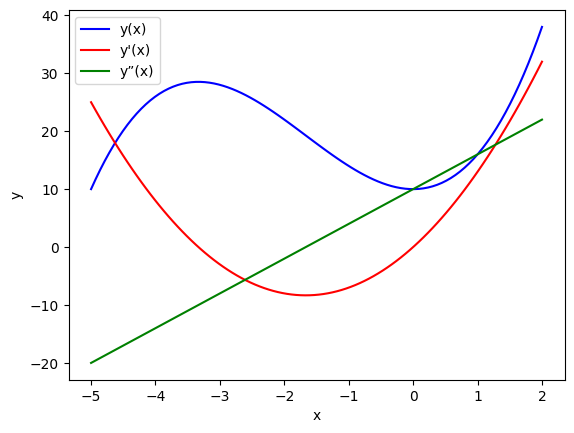

In [2]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

## Интерактивный режим Jupyter Notebook

Matplotlib предоставляет бэкэнд для генерации графиков в различных форматах:
* PNG
* PDF
* Postscript
* SVG

Также он дает возможность изображения графиков в различных виджет тулкитах:
* Qt
* GTK
* wxWidgets
* Cocoa

In [5]:
import matplotlib as mpl
mpl.use('GTK4Agg')
import matplotlib.pyplot as plt

ImportError: The GTK4 backends require PyGObject

In [ ]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

## Plotting multiple curves

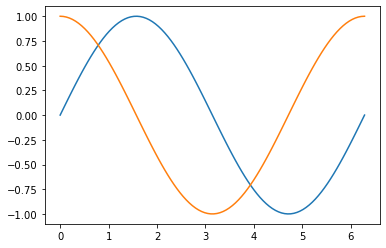

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 100)

Ya = np.sin(X)
Yb = np.cos(X)
plt.plot(X, Ya)
plt.plot(X, Yb)
plt.show()

The two curves show up with a different color automatically picked up by matplotlib.

We use one function call plt.plot() for one curve; thus, we have to call plt.plot()
here twice.
  However, we still have to call plt.show() only once. The functions calls plt.
plot(X, Ya) and plt.plot(X, Yb) can be seen as declarations of intentions. We want
to link those two sets of points with a distinct curve for each.

matplotlib will simply keep note of this intention but will not plot anything yet. The plt.show()
curve, however, will signal that we want to plot what we have described so far.

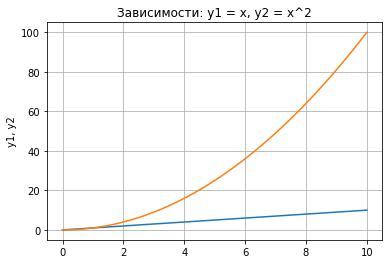

In [25]:
# Линейная зависимость 
x = np.linspace(0, 10, 50) 
y1 = x # Квадратичная зависимость 
y2 = [i**2 for i in x] # Построение графика 
plt.title('Зависимости: y1 = x, y2 = x^2') # заголовок plt.xlabel('x')         
# ось абсцисс 
plt.ylabel('y1, y2')    
plt.grid()              # ось ординат # включение отображение сетки 
plt.plot(x, y1, x, y2)  # построение графика

##  Deferred Rendering

This deferred rendering mechanism is central to matplotlib. You can declare what you render as and when it suits you. The graph will be rendered only when you call plt.show(). To illustrate this, let's look at the following script, which renders a bell-shaped curve, and the slope of that curve for each of its points:

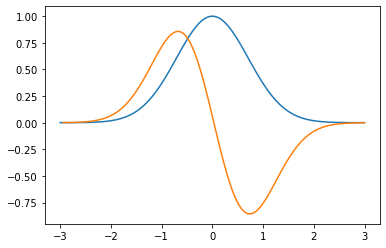

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_slope(X, Y):
    Xs= X[1:] - X[:-1]
    Ys = Y[1:] - Y[:-1]
    plt.plot(X[1:], Ys / Xs)
X = np.linspace(-3, 3, 100)
Y = np.exp(-X ** 2)
plt.plot(X, Y)
plot_slope(X, Y)
plt.show()

## Представление графиков на разных полях

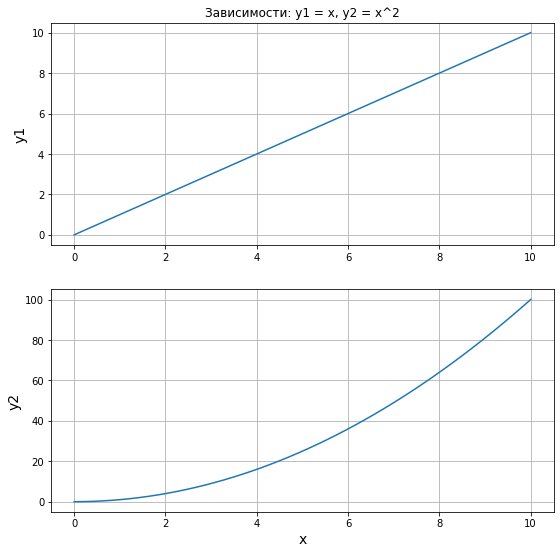

In [26]:
# Линейная зависимость
x = np.linspace(0, 10, 50) 
y1 = x # Квадратичная зависимость 
y2 = [i**2 for i in x]

# Построение графиков 
plt.figure(figsize=(9, 9)) 
plt.subplot(2, 1, 1) 
plt.plot(x, y1)                 # построение графика 
plt.title('Зависимости: y1 = x, y2 = x^2') # заголовок 
plt.ylabel('y1', fontsize=14)   
plt.grid(True)                  
plt.subplot(2, 1, 2) 
plt.plot(x, y2)                 
plt.xlabel('x', fontsize=14)    
plt.ylabel('y2', fontsize=14)   
plt.grid(True)                  # ось ординат 
# включение отображение сетки 
# построение графика # ось абсцисс # ось ординат # включение отображение сетки

Здесь мы воспользовались новыми функциями: 

• ``figure()``- функция для задания глобальных параметров отображения графиков. В нее, в качестве аргумента, мы передаем кортеж, определяющий размер общего поля. 

• ``subplot()`` - функция для задания местоположения поля с графиком. Существует несколько способов задания областей для вывода графиков. В примере мы  воспользовались вариантом, который предполагает передачу трех аргументов: первый аргумент- количество строк, второй - столбцов в формируемом поле, третий- индекс (номер поля, считаем сверху вниз, слева направо).

## Различные виды графиков

### Plotting points

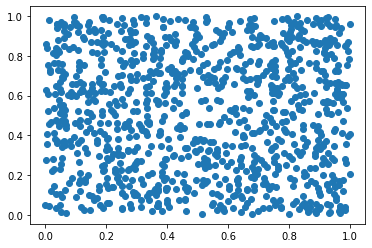

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(1024, 2)
plt.scatter(data[:,0], data[:,1])
plt.show()

### Bar Chart

**Диаграммы для категориальных данных**

Text(0, 0.5, 'Count')

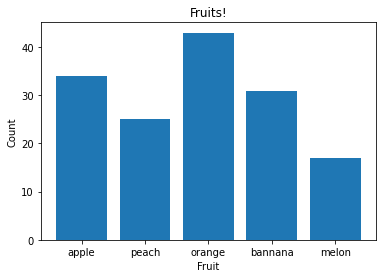

In [27]:
fruits = ['apple', 'peach', 'orange', 'bannana', 'melon']
counts = [34, 25, 43, 31, 17]
plt.bar(fruits, counts)
plt.title('Fruits!')
plt.xlabel('Fruit')
plt.ylabel('Count')

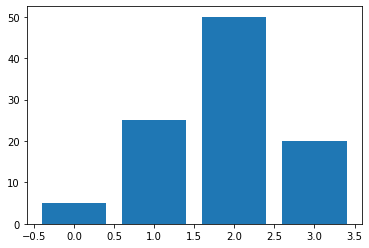

In [3]:
import matplotlib.pyplot as plt
data = [5., 25., 50., 20.]
plt.bar(range(len(data)), data)
plt.show()

**The thickness of a bar**

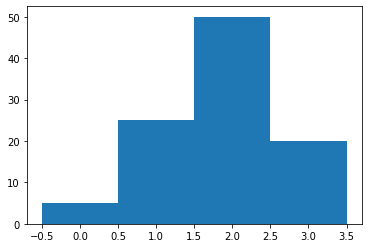

In [4]:
import matplotlib.pyplot as plt
data = [5., 25., 50., 20.]
plt.bar(range(len(data)), data, width = 1.)
plt.show()

**Horizontal bars**

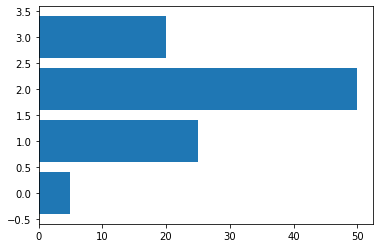

In [5]:
import matplotlib.pyplot as plt
data = [5., 25., 50., 20.]
plt.barh(range(len(data)), data)
plt.show()

**Plotting multiple bar charts**

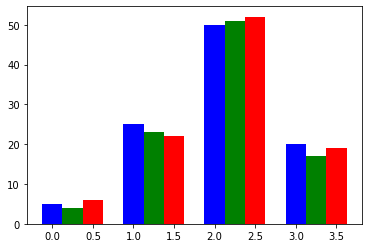

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = [[5., 25., 50., 20.],
 [4., 23., 51., 17.],
 [6., 22., 52., 19.]]
X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.show()

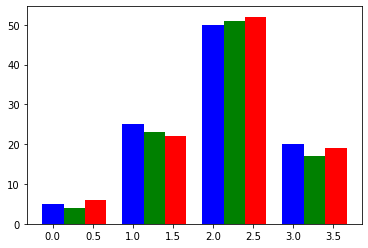

In [32]:
import numpy as np
import matplotlib.pyplot as plt
data = [[5., 25., 50., 20.],
 [4., 23., 51., 17.],
 [6., 22., 52., 19.]]
color_list = ['b', 'g', 'r']
gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i * gap, row,
    width = gap,
    color = color_list[i % len(color_list)])
plt.show()

**Plotting stacked bar charts**

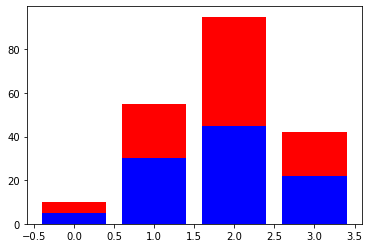

In [8]:
import matplotlib.pyplot as plt
A = [5., 30., 45., 22.]
B = [5., 25., 50., 20.]
X = range(4)
plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

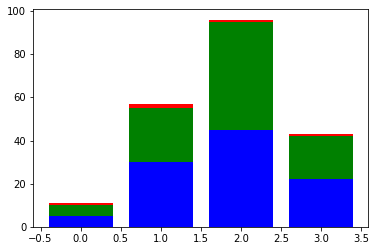

In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[5., 30., 45., 22.], [5., 25., 50., 20.],[1., 2., 1., 1.]])
colorlist = ['b', 'g', 'r']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    plt.bar(X, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(colorlist)])
plt.show()

**Plotting back-to-back bar charts**

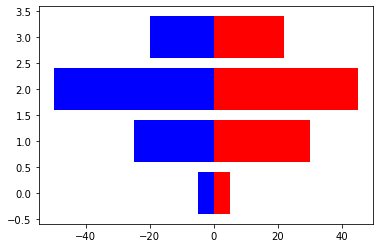

In [16]:
import numpy as np
import matplotlib.pyplot as plt
women_pop = np.array([5., 30., 45., 22.])
men_pop = np.array( [5., 25., 50., 20.])
X = np.arange(4)
plt.barh(X, women_pop, color = 'r')
plt.barh(X, -men_pop, color = 'b')
plt.show()

### Plotting pie charts

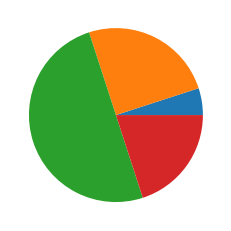

In [18]:
import matplotlib.pyplot as plt
data = [5, 25, 50, 20]
plt.pie(data)
plt.show()

### Plotting histograms

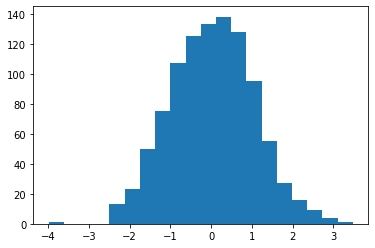

In [19]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(1000)
plt.hist(X, bins = 20)
plt.show()

### Plotting boxplots

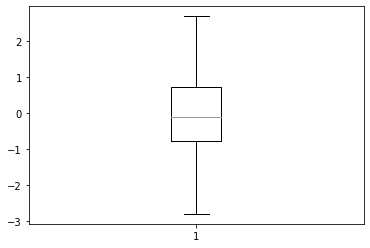

In [20]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(100)
plt.boxplot(data)
plt.show()


* The red bar is the median of the distribution.
* The blue box includes 50 percent of the data from the lower quartile to the upper quartile. Thus, the box is centered on the median of the data.
* The lower whisker extends to the lowest value within 1.5 IQR from the lower quartile.
* The upper whisker extends to the highest value within 1.5 IQR from the upper quartile.
* Values further from the whiskers are shown with a cross marker.

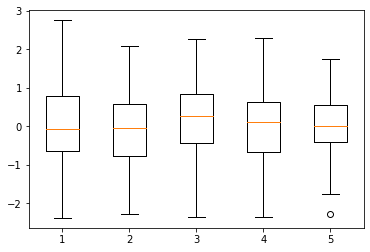

In [21]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(100, 5)
plt.boxplot(data)
plt.show()

### Plotting triangulations

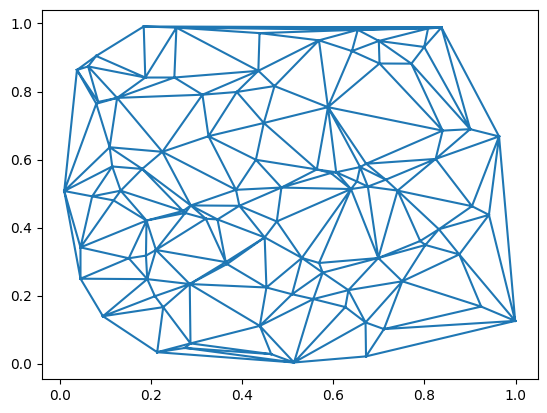

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
data = np.random.rand(100, 2)
triangles = tri.Triangulation(data[:,0], data[:,1])
plt.triplot(triangles)
plt.show()

### Networks and Graphs

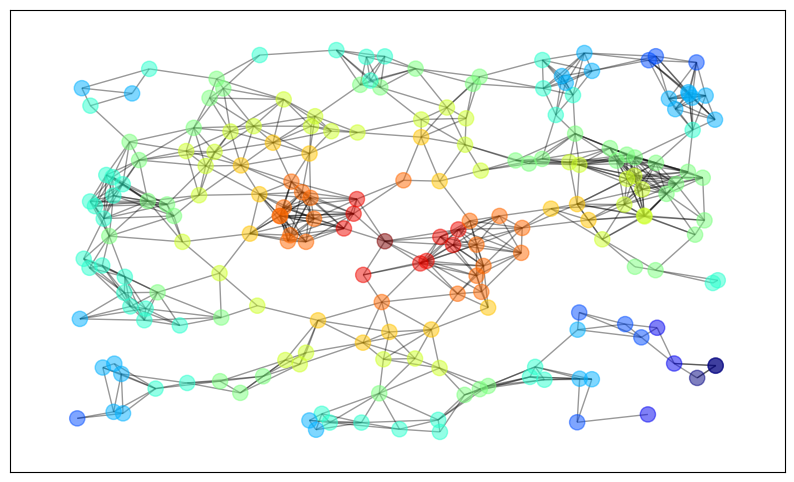

In [11]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()

{(0, 1): Text(-0.7214440989909969, 0.165123034778703, '0.3'),
 (0, 3): Text(0.03757316381022577, -0.008625034026104032, '0.1'),
 (2, 3): Text(0.7214440989909969, -0.16512303477870297, '0.7')}

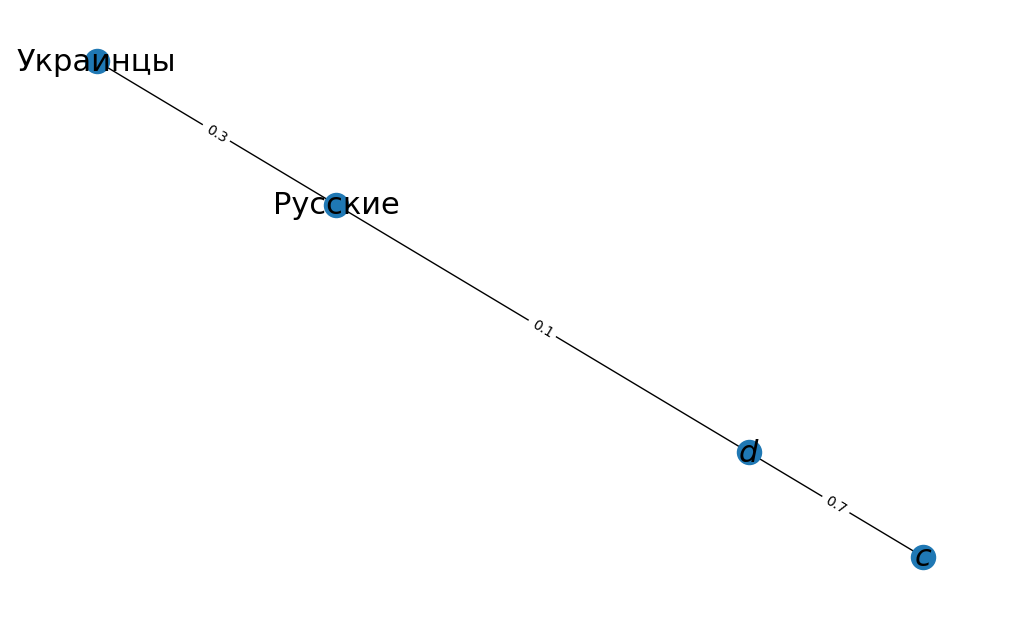

In [35]:
import numpy as np
import networkx as nx

g = nx.Graph()
A = np.array([[0,0.1,0,0.10],
              [0.3,0,0,0],
              [0,0,0,0.7],
              [.10,0,0,0]])

g = nx.from_numpy_matrix(A, create_using=nx.Graph)

pos = nx.spring_layout(g)
nx.draw(g, pos,)

labels = {}
labels[0] = "Русские"
labels[1] = "Украинцы"
labels[2] = r"$c$"
labels[3] = r"$d$"

nx.draw_networkx_labels(g, pos, labels, font_size=22, font_color="black")

edge_labels = nx.get_edge_attributes(g, "weight")

nx.draw_networkx_edge_labels(g, pos, edge_labels)

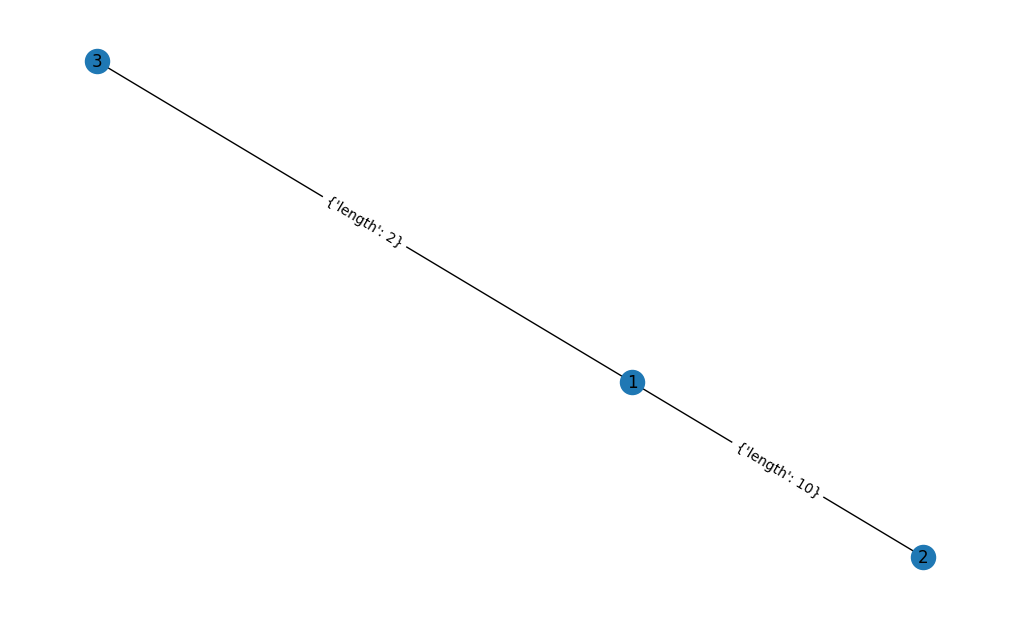

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1,2])
G.add_nodes_from([1,3])

G.add_edge(1,2, length = 10)
G.add_edge(1,3, length = 2)

pos = nx.spring_layout(G,weight='length')
nx.draw(G, pos, with_labels=True)

nx.draw_networkx_edge_labels(G, pos)
plt.show()

The route of the traveller is: [0, 4, 19, 12, 2, 7, 10, 18, 5, 13, 6, 11, 3, 16, 17, 15, 14, 8, 9, 1, 0]


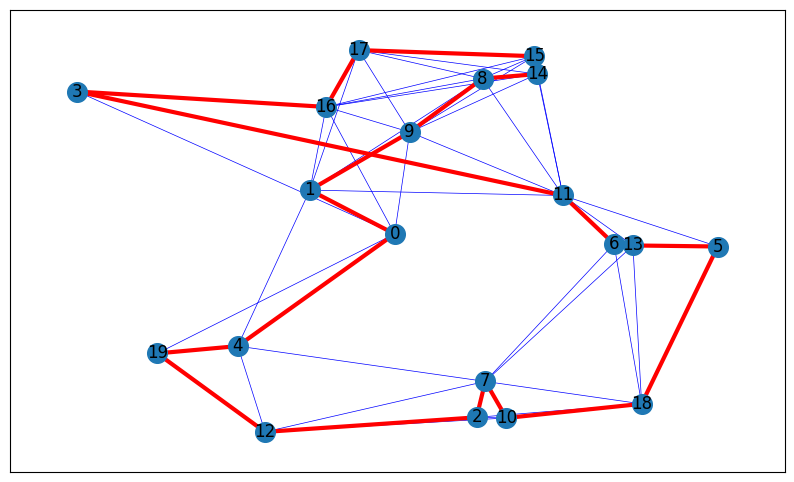

In [66]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller is:", cycle)
plt.show()

In [76]:
import networkx
G=networkx.Graph()
G.add_edge(1,2,length=1)
G.add_edge(2,3,length=4)
# assigns edge weight as graphviz "weight" attribute
pos=networkx.graphviz_layout(G)
networkx.draw_networkx(G,pos)

H=networkx.Graph(G)
# replace all the edge data with a dictionary of
# the single graphviz keyword "len" set to the weight
for (u,v,w) in G.edges(data=True):
    H.add_edge(u,v,{'len':str(w)})
pos=networkx.graphviz_layout(H)
networkx.draw_networkx(G,pos)

AttributeError: module networkx has no attribute graphviz_layout

In [54]:
import torch
import networkx as nx

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = torch_geometric.data.Data(x=x, edge_index=edge_index)
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g)

AttributeError: module 'torch' has no attribute 'tensor'

In [55]:
>>> G = nx.DiGraph()
>>> G.add_edge('A', 'B', minlen = 1)
>>> G.add_edge('B', 'C', minlen = 10)
>>> nx.draw(G, pos=nx.drawing.nx_agraph.graphviz_layout(G, prog='dot'))
>>> plt.show()

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [58]:
%python -m pip install --global-option=build_ext '
              --global-option="-IC:\Program Files\Graphviz\include" 
              --global-option="-LC:\Program Files\Graphviz\lib" '
              pygraphviz

IndentationError: unexpected indent (2977523252.py, line 2)

In [43]:
>>> G=nx.path_graph(4)
>>> pos=nx.spring_layout(G)

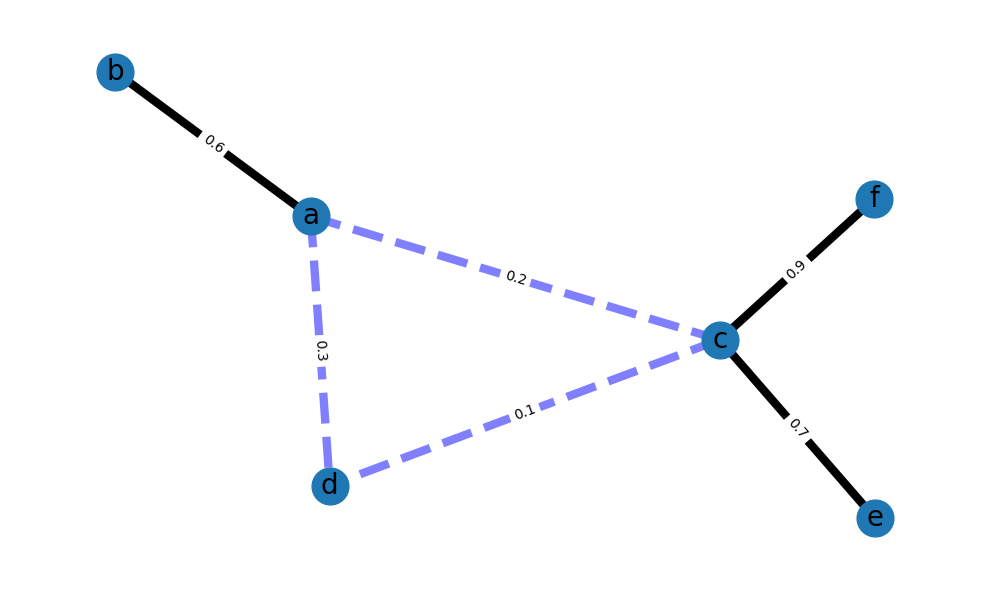

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [27]:
G

In [26]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [22]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([ (0, 1, None, 3, None),
               (2, 0, 4, 1, None),
               (5, None, 0, 3, None),
               (None, None, None, 0, None),
               (None, None, None, 2, 0),
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)   

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('out.png', format='png', prog='neato')

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 3: 1, 5: 1, 0: 2, 1: 2, 2: 2, 6: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 8: 2, 4: 2, 9: 3, 3: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 8: 1, 6: 1, 9: 2, 5: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 9: 1, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


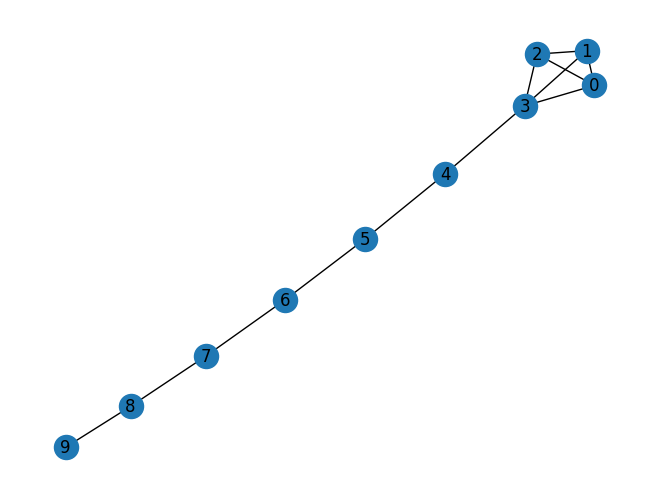

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [46]:
nx.get_edge_attributes(g,'distance')

Object `nx.get_edge_attributes(g,'distance')` not found.


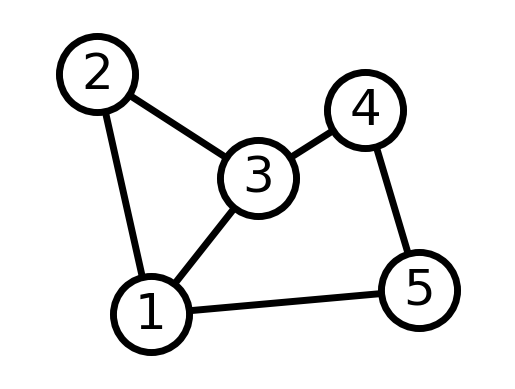

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [4]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [3]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [2]:
import networkx as nx
import numpy as np

A = np.array(
    [
        (0, 1, np.inf),
        (2, 0, 4),
        (5, np.inf, 0),
    ],
    dtype="float",
)

# if edge is np.inf replace with zero
A[A == np.inf] = 0

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)
G = nx.drawing.nx_agraph.to_agraph(G)
G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="0.3")
G.draw("out.png", format="png", prog="neato")

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [2]:
%pip install pygraphviz

  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: pygraphviz is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for pygraphviz did not run successfully.
  exit code: 1
  
  [51 lines of output]
  running install
  C:\Users\79618\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-310\pygraphviz
  copying pygra

In [1]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [8]:
%pip install -c alubbock pygraphviz


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'alubbock'


- [ ] https://networkx.org/documentation/stable/auto_examples/external/plot_igraph.html#sphx-glr-auto-examples-external-plot-igraph-py
- [ ] https://stackoverflow.com/questions/40088042/networkx-get-the-distance-between-nodes
- [ ] https://stackoverflow.com/questions/2383121/change-node-display-size-in-networkx
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
- [ ] https://networkx.org/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py
- [ ] https://networkx.org/documentation/stable/tutorial.html#removing-elements-from-a-graph
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_tsp.html#sphx-glr-auto-examples-drawing-plot-tsp-py
- [ ] https://habr.com/ru/post/125898/
- [ ] https://pygraphviz.github.io/documentation/stable/install.html
- [ ] https://blog.skillfactory.ru/5-grafov-kotorye-dolzhen-znat-kazhdyj-data-scientist/
- [ ] https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py
- [ ] https://networkx.org/documentation/stable//reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html
- [ ] https://networkx.org/documentation/stable/reference/classes/index.html
- [ ] https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html#random-geometric-graph
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_tsp.html
- [ ] https://pygraphviz.github.io/documentation/stable/install.html
- [ ] https://stackoverflow.com/questions/29797990/networkx-spring-layout-with-different-edge-values
- [ ] https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
- [ ] https://developer.mozilla.org/ru/docs/Web/JavaScript/Reference/Global_Objects/Math/hypot
- [ ] https://networkx.org/documentation/stable/search.html?q=layout
- [ ] https://necromuralist.github.io/data_science/posts/distance-in-social-networks/
- [ ] https://stackoverflow.com/questions/15661384/python-does-not-see-pygraphviz/39976362#39976362
- [ ] https://stackoverflow.com/questions/64261546/how-to-solve-error-microsoft-visual-c-14-0-or-greater-is-required-when-inst
- [ ] https://networkx.org/documentation/stable/tutorial.html
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html#sphx-glr-auto-examples-drawing-plot-degree-py
- [ ] https://networkx.org/documentation/stable/reference/classes/index.html
- [ ] https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html#set-edge-attributes
- [ ] https://stackoverflow.com/questions/68210990/how-to-plot-the-distance-between-points-networkx
- [ ] https://stackoverflow.com/questions/43160240/how-to-plot-a-k-distance-graph-in-python
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
- [ ] https://networkx.org/documentation/stable/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
- [ ] https://networkx.org/documentation/stable/auto_examples/external/plot_igraph.html#sphx-glr-auto-examples-external-plot-igraph-py